# Domácí úkol č. 4

V tomto domácím úkolu budeme řešit soustavu $\mathsf{A}\mathbf{x}=\mathbf{b}$ se symetrickou pozitivně definitní maticí pomocí metody největšího spádu.

In [1]:
# Zavolejte tuto bunku, cimz vytvorime nahodnou symetrickou pozitivne definitni matici

import numpy as np

np.random.seed(42)  # Nastavíme seed pro generátor náhodných čísel, abychom vždy dostali stejnou matici

n = 10
U = np.triu(np.random.rand(n, n), 1)
d = 100 * np.random.rand(n, 1)
A = np.diag(d.flatten()) + U + U.T  # matice soustavy
b = np.random.rand(n, 1)            # vektor prave strany
x0 = np.zeros((n, 1))               # pocatecni odhad reseni

In [2]:
import numpy as np

def steepest_descent(A, b, x0, tol, max_it):
    """
    Resi system Ax=b s SPD matici A.
    A: matice soustavy
    b: vektor prave strany
    x0: pocatecni odhad
    tol: relativni presnost
    max_it: maximalni pocet iteraci
    """

    # citac iteraci
    k = 0   

    # vektor pocatecniho rezidua
    x = x0
    r = b - A @ x
    residuals = [np.linalg.norm(r)]

    # pro vypocet ukoncovaci podminky
    r_init = np.linalg.norm(b - np.dot(A, x0))

    # hlavni smycka
    while k < max_it and (np.linalg.norm(b - np.dot(A, x)) / r_init > tol):
        # vypocet x_{k+1}
        alpha = (r.T @ r)/(r.T @ A @ r)
        x = x + (alpha * r)

        # vypocet r_{k+1}
        r = b - (A @ x)

        # navysime citac iteraci
        k += 1

        # ulozime reziduum
        residuals.append(np.linalg.norm(r) / r_init)

    return x, k, residuals

In [3]:
# Zavolame vami upravenou funkci:
x, k, _ = steepest_descent(A, b, x0, 1e-12, 1000)

# Otestujeme, zda je reseni v poradku
x_matlab = np.linalg.solve(A, b)
n = np.linalg.norm(x - x_matlab)

if n < 1e-8:
    print("Vase funkce steepestDescent pravdepodobne pracuje spravne.\n")
else:
    print("Ve funkci steepestDescent nejspis chyba.\n")

# Priklad 2
# Pomoci metody steepestDescent_ex vyreste soustavu s ruznou presnosti.
# Zapiste pocty iteraci potrebne k dosazeni dane presnosti do tabulky:
x, k1, _ = steepest_descent(A, b, x0, 0.01, 2000)
x, k2, _ = steepest_descent(A, b, x0, 0.0001, 2000)
x, k3, residuals = steepest_descent(A, b, x0, 1e-8, 2000)

print("Pocty iteraci metody nejvetsiho spadu: ")
print([k1, k2, k3])

# Doplnte tabulku
# Metoda nejvetsiho spadu:
# tol = 0.01,   k =
# tol = 0.0001, k =
# tol = 1e-8,   k =

Vase funkce steepestDescent pravdepodobne pracuje spravne.

Pocty iteraci metody nejvetsiho spadu: 
[34, 100, 234]


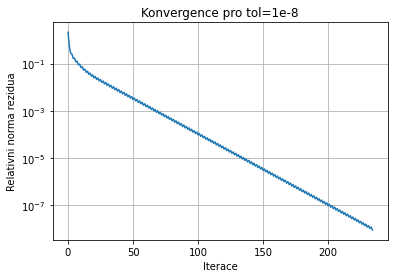

In [4]:
# Nakonec vykreslime graf normy rezidua v zavislosti na iteraci do 
# semilogaritmickeho grafu
import matplotlib.pyplot as plt
plt.semilogy(range(k3+1), residuals)
plt.xlabel('Iterace')
plt.ylabel('Relativni norma rezidua')
plt.title('Konvergence pro tol=1e-8')
plt.grid(True)
plt.show()